In [23]:
"""

Need to make use of 2 conditional edges.
Input: initial_state = AgentState(number1 = 10, operation= "-", number2 = 5, number3 = 7, number4 = 2, operation2 = "+", finalNumber = 0, finalNumber2 = 0)

"""

'\n\nNeed to make use of 2 conditional edges.\nInput: initial_state = AgentState(number1 = 10, operation= "-", number2 = 5, number3 = 7, number4 = 2, operation2 = "+", finalNumber = 0, finalNumber2 = 0)\n\n'

In [24]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [25]:
class AgentState(TypedDict):
  number1: int
  operation: str
  number2: int

  number3: int
  operation2: str
  number4: int

  finalNumber: int
  finalNumber2: int

In [26]:
def adder_node_one(state: AgentState) -> AgentState:
  """ This node adds number1 and number2 """

  state['finalNumber'] = state['number1'] + state['number2']
  return state

def subtractor_node_one(state: AgentState) -> AgentState:
  """ This node subtracts number 1 and number2 """

  state['finalNumber'] = state['number1'] - state['number2']
  return state


def router_logic_one(state: AgentState) -> AgentState:
  """ This node controls the flow of execution: either adder_node_one or subtractor_node_one """

  if state['operation'] == "+":
    print("Adder_noder_one edge call")
    return "addition_operation_one"

  if state['operation'] == "-":
    print("Subtractor_node_one edge call")
    return "subtraction_operation_one"

In [27]:
def adder_node_two(state: AgentState) -> AgentState:
  """ This node adds number3 and number4 """

  state['finalNumber2'] = state['number3'] + state['number4']
  return state

def subtractor_node_two(state: AgentState) -> AgentState:
  """ This node subtracts number3 and number4 """

  state['finalNumber2'] = state['number3'] - state['number4']
  return state

def router_logic_two(state: AgentState) -> AgentState:
  """ This node controls the flow of execution: either adder_node_two or subtractor_node_two """

  if state['operation2'] == "+":
    # call edge
    print("Adder_noder_two edge call")
    return "addition_operation_two"

  if state['operation2'] == "-":
    # call edge
    print("Subtractor_node_two edge call")
    return "subtraction_operation_two"

In [28]:
graph = StateGraph(state_schema = AgentState)

graph.add_node("adder", adder_node_one)
graph.add_node("subtractor", subtractor_node_one)
graph.add_node("router_one", lambda state: state)

graph.add_edge(START, "router_one")
graph.add_conditional_edges(
    "router_one",
    router_logic_one,

    {
        # Edge: Node
        "addition_operation_one": "adder",
        "subtraction_operation_one": "subtractor"

    }
)
graph.add_edge("adder", "router_two")
graph.add_edge("subtractor", "router_two")

graph.add_node("router_two", lambda state: state)
graph.add_node("adder_2", adder_node_two)
graph.add_node("subtractor_2", subtractor_node_two)
graph.add_conditional_edges(
    "router_two",
    router_logic_two,

    {
        # Edge: Node
        "addition_operation_two": "adder_2",
        "subtraction_operation_two": "subtractor_2"
    }
)
graph.add_edge("adder_2", END)
graph.add_edge("subtractor_2", END)

app = graph.compile()

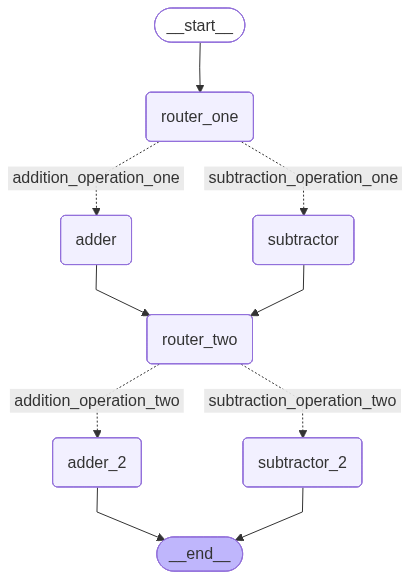

In [29]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [30]:
initial_state_1 = AgentState(number1 = 10, operation= "-", number2 = 5, number3 = 7, number4 = 2, operation2 = "+", finalNumber = 0, finalNumber2 = 0)
print(app.invoke(initial_state_1))

Subtractor_node_one edge call
Adder_noder_two edge call
{'number1': 10, 'operation': '-', 'number2': 5, 'number3': 7, 'operation2': '+', 'number4': 2, 'finalNumber': 5, 'finalNumber2': 9}


In [31]:
initial_state_2 = AgentState(number1 = 10, operation= "+", number2 = 5, number3 = 7, number4 = 2, operation2 = "-", finalNumber = 0, finalNumber2 = 0)
print(app.invoke(initial_state_2))

Adder_noder_one edge call
Subtractor_node_two edge call
{'number1': 10, 'operation': '+', 'number2': 5, 'number3': 7, 'operation2': '-', 'number4': 2, 'finalNumber': 15, 'finalNumber2': 5}
